# Extended Graham scan algorithm

## Extended graham scan algorithm implementation

In [7]:
import math

def find_edge_points(inputSet):
    #b -> bottom most point, t -> top most point, l -> left most point, r -> right most point
    b,t,l,r = inputSet[0],inputSet[0],inputSet[0],inputSet[0]

    for i in range(1,len(inputSet)):
        if inputSet[i][1] < b[1]:
            b = inputSet[i]
        elif inputSet[i][1] == b[1] and inputSet[i][0] < b[0]:
            b = inputSet[i]

        if inputSet[i][1] > t[1]:
            t = inputSet[i]
        elif inputSet[i][1] == t[1] and inputSet[i][0] > t[0]:
            t = inputSet[i]

        if inputSet[i][0] < l[0]:
            l = inputSet[i]
        elif inputSet[i][0] == l[0] and inputSet[i][1] > l[1]:
            l = inputSet[i]

        if inputSet[i][0] > r[0]:
            r = inputSet[i]
        elif inputSet[i][0] == r[0] and inputSet[i][1] < r[1]:
            r = inputSet[i]

    return b,t,l,r

def find_bottom_most(inputSet): 
    bottomMost = inputSet[0]
    
    for i in range(1,len(inputSet)):
        if inputSet[i][1] < bottomMost[1]:
            bottomMost = inputSet[i]
        elif inputSet[i][1] == bottomMost[1] and inputSet[i][0] < bottomMost[0]:
            bottomMost = inputSet[i]
            
    return bottomMost

def find_highest_point(p1,p2,inputSet):

    if len(inputSet) == 0: return
    
    target = inputSet[0]
    for p in inputSet:
        if abs(cross_product(p1,p2,p)) > abs(cross_product(p1,p2,target)):
            target = p

    return target

def polar_angle(p1,p2):

    if p1==p2: return 0
    return (p2[0]-p1[0])/math.sqrt(distance(p1,p2))

def distance(p2,p1):

    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def cross_product(p1,p2,p3):

    y1 = p2[1] - p1[1]
    y2 = p3[1] - p1[1]
    x1 = p2[0] - p1[0]
    x2 = p3[0] - p1[0]

    return y2 * x1 - y1 * x2

def eliminate_dots(inputSet):
    b,t,l,r = find_edge_points(inputSet)

    res = []
    for p in inputSet: 
        if not dot_in_area(b,t,l,r,p):
            res.append(p)
    return res

def dot_in_area(b,t,l,r,point):
    v1 = cross_product(b,r,point)
    v2 = cross_product(r,t,point)
    v3 = cross_product(t,l,point)
    v4 = cross_product(l,b,point)

    if v1 > 0 and v2 > 0 and v3 > 0 and v4 > 0:  #in middle
        return True

    return False
       
def grahamscan(inputSet):
    if len(inputSet) <= 2: return

    inputSet = eliminate_dots(inputSet)
    start = find_bottom_most(inputSet)
    pointsWithAngle = []
    for p in inputSet:
        pointsWithAngle.append([p,polar_angle(start,p)])
        
    sortedSet = [i[0] for i in sorted(pointsWithAngle, key = lambda x: x[1])]
    outputSet = [start,sortedSet[0]]

    for point in sortedSet:
        while len(outputSet) >= 2 and cross_product(outputSet[-2],outputSet[-1],point) >= 0:
            outputSet.pop()
        outputSet.append(point)
        
    return outputSet

## data points generation

In [8]:
from random import *
from math import *

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_worst(N):
    points = []
    radius = MAXX // 2
    angle = 0
    while len(points) <= N:
        x=randint(1,30000)
        y=randint(1,30000)
        point = [x,y]
        if distance([15000,15000],point)>15000**2:
            points.append([x,y])
            angle += (2*pi) / N
    
    return points


## Timer function

In [9]:
import timeit

def timer_random():
    times = []
    stmt_code = "[grahamscan(inputSets_random[n]) for n in range(7)]"
    setup_code = '''
from __main__ import grahamscan
from __main__ import inputSets_random
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: grahamscan(inputSets_random[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

def timer_worst():
    times = []
    stmt_code = "[grahamscan(inputSets_worst[n]) for n in range(7)]"
    setup_code = '''
from __main__ import grahamscan
from __main__ import inputSets_worst
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: grahamscan(inputSets_worst[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

## Plot function

In [10]:
import matplotlib.pyplot as plt

def plot(times):
    NS = [100,500,1000,5000,10000,15000,20000]
    fig = plt.figure()
    graph = fig.add_subplot(111)
    graph.set(title='analysis graph', ylabel='Time', xlabel='Number of points')
    graph.plot(NS,times)
    plt.show()

## Test code for random case

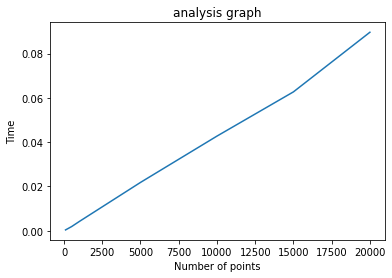

In [11]:
#generate random datatSet 
inputSets_random = [generate_random(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_random()
plot(times)

## Test code for worst case

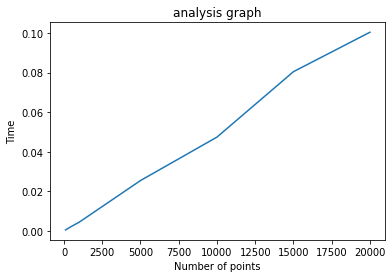

In [12]:
#generate worst-case datatSet 
inputSets_worst = [generate_worst(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_worst()
plot(times)



*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

In [ ]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 